<a href="https://colab.research.google.com/github/hg2511/Deep_learning/blob/main/Dogs_vs_cats_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [13]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:56<00:00, 21.0MB/s]
100% 1.06G/1.06G [00:56<00:00, 20.2MB/s]


In [14]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [16]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int', # assigned cats ==> 0 and dogs ==> 1
    batch_size = 32,
    image_size = (256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int', # assigned cats ==> 0 and dogs ==> 1
    batch_size = 32,
    image_size = (256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [17]:
# normalization
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds  = validation_ds.map(process)

In [18]:

# create cnn model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 79s 104ms/step - loss: 1.3787 - accuracy: 0.5964 - val_loss: 0.6816 - val_accuracy: 0.6308
Epoch 2/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5663 - accuracy: 0.7133 - val_loss: 0.6640 - val_accuracy: 0.6294
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4825 - accuracy: 0.7713 - val_loss: 0.5406 - val_accuracy: 0.7258
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4154 - accuracy: 0.8097 - val_loss: 0.4526 - val_accuracy: 0.7888
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3604 - accuracy: 0.8406 - val_loss: 0.4404 - val_accuracy: 0.8046
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2837 - accuracy: 0.8791 - val_loss: 0.5164 - val_accuracy: 0.7788
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2071 - accuracy: 0.9158 - val_loss: 0.4718 - val_ac

In [22]:
# without batch normalization and dropout

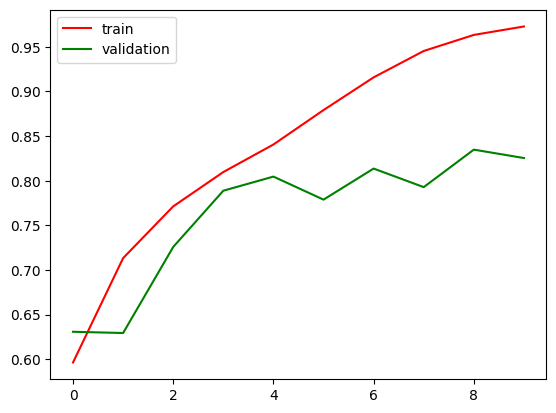

In [23]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='validation')
plt.legend()
plt.show()

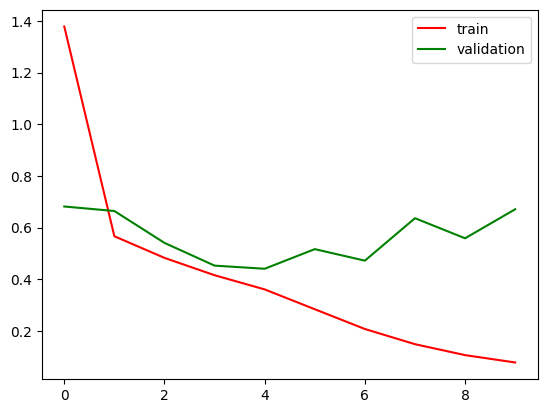

In [24]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='green', label='validation')
plt.legend()
plt.show()

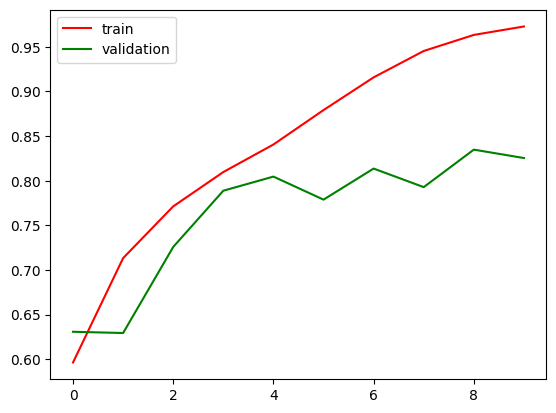

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='validation')
plt.legend()
plt.show()

In [26]:
# with batchnormalization and dropout

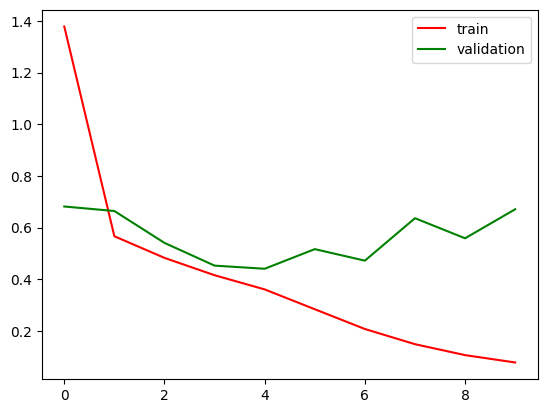

In [27]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='green', label='validation')
plt.legend()
plt.show()

In [28]:
import cv2

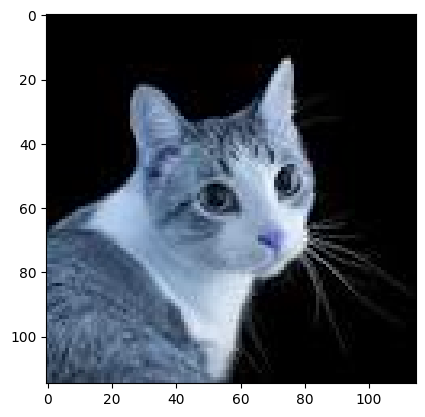

In [31]:
test_img = cv2.imread('/content/cat.jpeg')
plt.imshow(test_img)

In [32]:
test_img.shape

(115, 115, 3)

In [35]:
test_img = cv2.resize(test_img,(256,256))

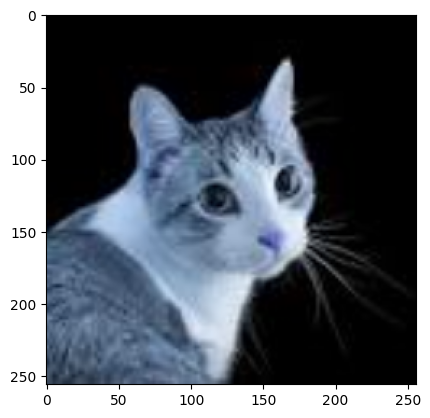

In [36]:
plt.imshow(test_img)

In [37]:
test_input = test_img.reshape((1,256,256,3))

In [38]:
model.predict(test_input)   # 0 for cat and 1for dog

1/1 [==============================] - 0s 362ms/step


array([[0.]], dtype=float32)

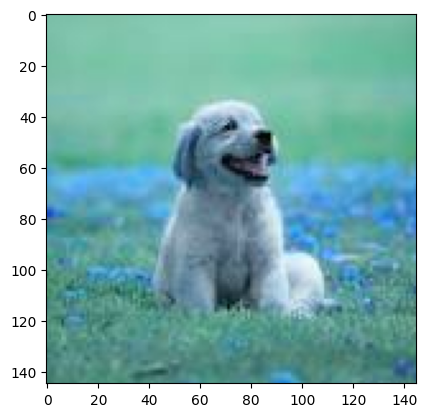

In [39]:
test_dog_img = cv2.imread('/content/dog.jpeg')
plt.imshow(test_dog_img)

In [40]:
test_dog_img.shape

(145, 145, 3)

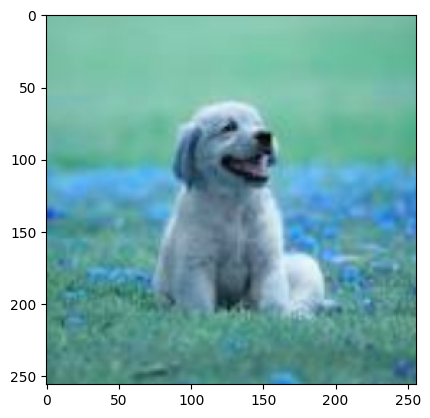

In [41]:
test_dog_img = cv2.resize(test_dog_img,(256,256))
plt.imshow(test_dog_img)

In [42]:
test_dog_input = test_dog_img.reshape((1,256,256,3))

In [50]:
predicttion = model.predict(test_dog_input)

1/1 [==============================] - 0s 23ms/step
